C:\Users\rishi\AppData\Local\Temp\ipykernel_28972\1175577059.py:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)


            Sales
Month            
1901-01-01  266.0
1901-02-01  145.9
1901-03-01  183.1
1901-04-01  119.3
1901-05-01  180.3


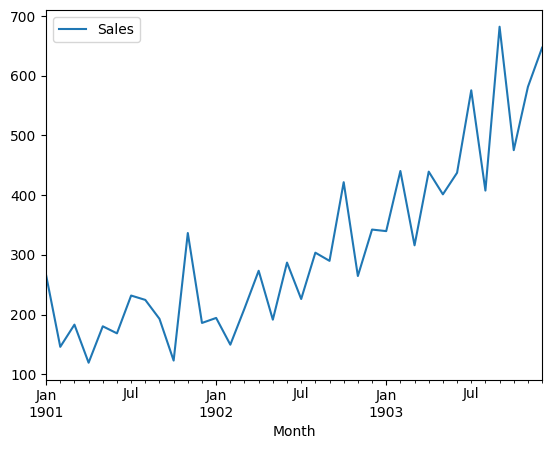

In [2]:
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot

def parser(x):
    return datetime.strptime('190' + x, '%Y-%m')

series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()


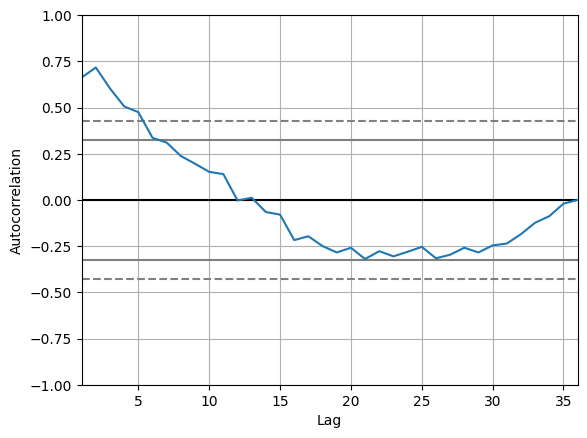

In [3]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

C:\Users\rishi\AppData\Local\Temp\ipykernel_28972\870407616.py:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, date_parser=parser)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Thu, 26 Dec 2024   AIC                            408.969
Time:                        22:46:50   BIC                            418.301
Sample:                    01-31-1901   HQIC                           412.191
                         - 12-31-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

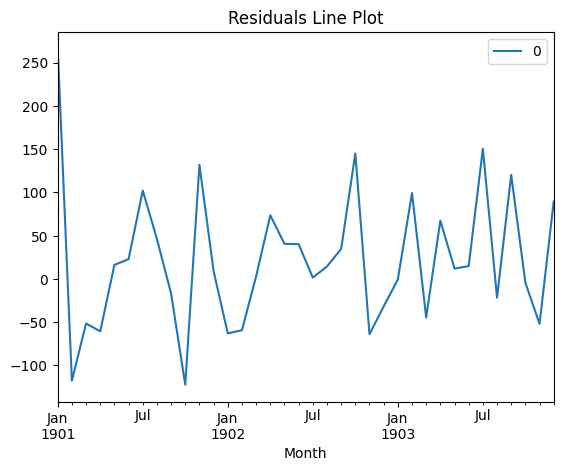

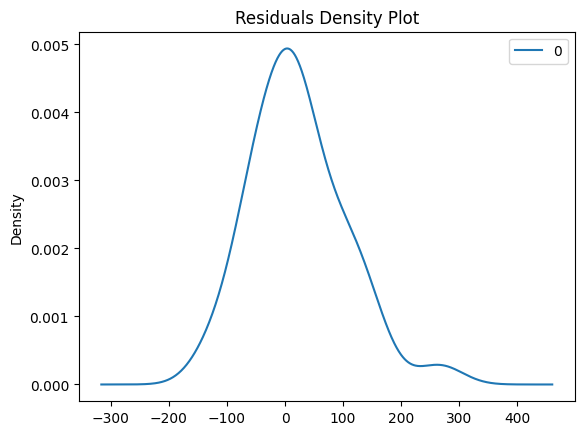

                0
count   36.000000
mean    21.936144
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000


In [4]:
from datetime import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

# Load dataset
def parser(x):
    return datetime.strptime('190' + x, '%Y-%m')

series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, date_parser=parser)
series.index = series.index.to_period('M')

# Fit ARIMA model
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit()

# Summary of the fit model
print(model_fit.summary())

# Line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.title("Residuals Line Plot")
pyplot.show()

# Density plot of residuals
residuals.plot(kind='kde')
pyplot.title("Residuals Density Plot")
pyplot.show()

# Summary statistics of residuals
print(residuals.describe())


C:\Users\rishi\AppData\Local\Temp\ipykernel_28972\3749782860.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True)


predicted=343.272, expected=342.300
predicted=293.330, expected=339.700
predicted=368.669, expected=440.400
predicted=335.045, expected=315.900
predicted=363.220, expected=439.300
predicted=357.645, expected=401.300
predicted=443.048, expected=437.400
predicted=378.366, expected=575.500
predicted=459.415, expected=407.600
predicted=526.891, expected=682.000
predicted=457.231, expected=475.300
predicted=672.915, expected=581.300
predicted=531.541, expected=646.900
Test RMSE: 89.021


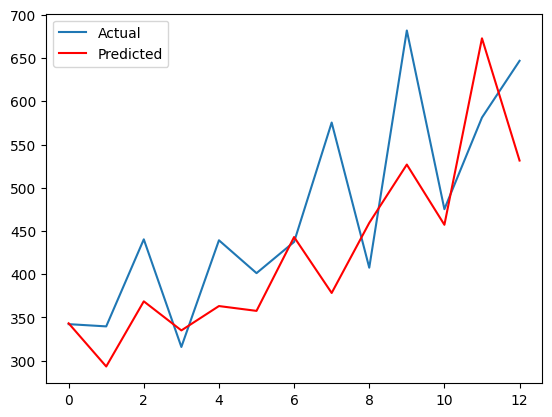

In [7]:
from datetime import datetime
from pandas import read_csv, to_datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load dataset
def parser(x):
    return datetime.strptime('190' + x, '%Y-%m')

# Read CSV and convert the index to datetime format
series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True)

# Attempt to infer mixed formats, let pandas handle inconsistencies
series.index = to_datetime(series.index, errors='coerce', format='mixed').to_period('M')

# Split into train and test sets
X = series.values.flatten()  # Ensure X is a 1D array
size = int(len(X) * 0.66)
train, test = X[:size], X[size:]
history = list(train)
predictions = []

# Walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]  # Get the forecasted value
    predictions.append(yhat)
    obs = test[t]  # Test value is scalar, no need to flatten
    history.append(obs)  # Add the observed value to history
    print(f'predicted={yhat:.3f}, expected={obs:.3f}')

# Evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print(f'Test RMSE: {rmse:.3f}')

# Plot forecasts against actual outcomes
pyplot.plot(test, label='Actual')
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.legend()
pyplot.show()
